In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 6.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import datasets

# Load the dataset
dataset = datasets.load_dataset('wmt16', 'de-en')


Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split:   0%|          | 0/4548885 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2169 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2999 [00:00<?, ? examples/s]

Dataset wmt16 downloaded and prepared to /root/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 4548885
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2169
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2999
    })
})

In [ ]:
from datasets import DatasetDict

# train_data = DatasetDict(dataset['train'][:454888])
# val_data = DatasetDict(dataset['validation'][:216])
# test_data = DatasetDict(dataset['test'][:299])

train_data = dataset['train'][:454888]
val_data = dataset['validation']
test_data = dataset['test']

In [ ]:
from tqdm.auto import tqdm

# Get the English sentences from the training split

english_sentences = [dataset['train'][i]['translation']['en'] for i in tqdm(range(len(dataset['train'])//10))]

  0%|          | 0/454888 [00:00<?, ?it/s]

In [ ]:
from tqdm.auto import tqdm

# Get the English sentences from the training split

english_sentences_valid = [dataset['validation'][i]['translation']['en'] for i in tqdm(range(len(dataset['validation'])))]

  0%|          | 0/2169 [00:00<?, ?it/s]

In [ ]:
from tqdm.auto import tqdm

# Get the German sentences from the training split
german_sentences = [dataset['train'][i]['translation']['de'] for i in tqdm(range(len(dataset['train'])//10))]


  0%|          | 0/454888 [00:00<?, ?it/s]

In [ ]:
from tqdm.auto import tqdm

# Get the German sentences from the training split
german_sentences_valid = [dataset['validation'][i]['translation']['de'] for i in tqdm(range(len(dataset['validation'])))]

  0%|          | 0/2169 [00:00<?, ?it/s]

In [ ]:
import string

In [ ]:
def preprocess_text(text):
    # Remove punctuation using the string library
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Lowercase the text
    text = text.lower()
    return text


eng_sentences = []
ger_sentences = []
eng_sentences_val = []
ger_sentences_val = []
eng_sentences_test = []
ger_sentences_test = []


for s1, s2 in zip(english_sentences, german_sentences):
  eng_sentences.append(preprocess_text(s1))
  ger_sentences.append(preprocess_text(s2))


for p1, p2 in zip(english_sentences_valid, german_sentences_valid):
  eng_sentences_val.append(preprocess_text(s1))
  ger_sentences_val.append(preprocess_text(s2))


# for p1, p2 in zip(english_sentences_test, german_sentences_test):
#   eng_sentences_test.append(preprocess_text(s1))
#   ger_sentences_test.append(preprocess_text(s2))

In [ ]:
type(english_sentences)

list

In [ ]:
ger_sentences

**Visualise the dataset**

**1. Sequence Length**

In [ ]:
# Get the sequence lengths for each language
english_lengths = [len(sentence.split()) for sentence in eng_sentences]
german_lengths = [len(sentence.split()) for sentence in ger_sentences]

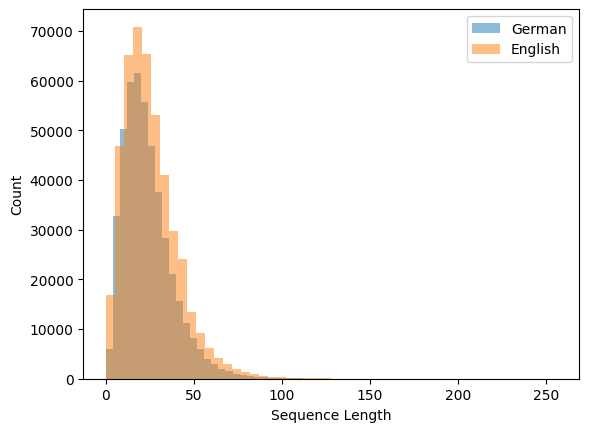

In [ ]:
# Plot the histograms
plt.hist(german_lengths, bins=50, alpha=0.5, label='German')
plt.hist(english_lengths, bins=50, alpha=0.5, label='English')
plt.xlabel('Sequence Length')
# plt.xlim(0, 150)
plt.ylabel('Count')
plt.legend()
plt.show()

**2. Frequency of Words**

In [ ]:
import nltk
nltk.download('punkt')
from collections import Counter

# # Tokenize the German and English sentences
# german_tokens = [token for sentence in german_sentences for token in nltk.word_tokenize(sentence)]
# english_tokens = [token for sentence in english_sentences for token in nltk.word_tokenize(sentence)]


# Tokenize the German sentences
german_tokens = []
for sentence in ger_sentences:
    for token in nltk.word_tokenize(sentence):
        german_tokens.append(token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Tokenize the English sentences
english_tokens = []
for sentence in eng_sentences:
    for token in nltk.word_tokenize(sentence):
        english_tokens.append(token)

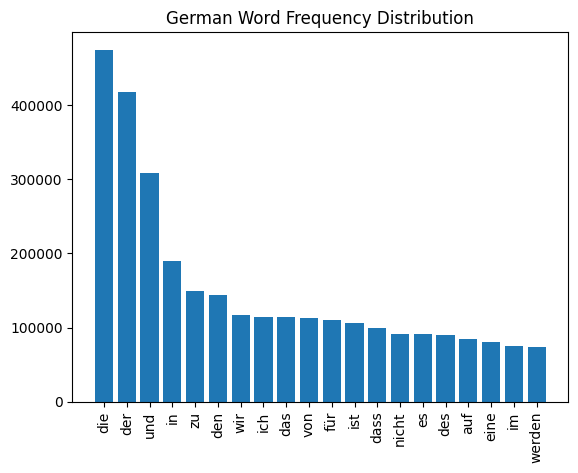

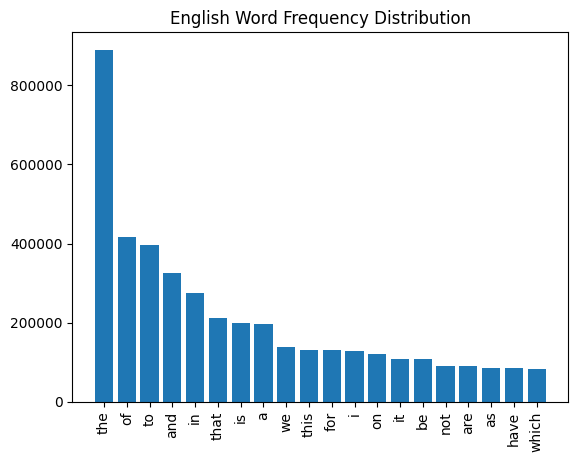

In [ ]:
# Get the frequency distribution for each language
german_freq = Counter(german_tokens)
english_freq = Counter(english_tokens)

# Get the top 20 most common words in each language
german_top_words = german_freq.most_common(20)
english_top_words = english_freq.most_common(20)

# Plot the bar charts
plt.bar(range(len(german_top_words)), [freq for word, freq in german_top_words], tick_label=[word for word, freq in german_top_words])
plt.xticks(rotation=90)
plt.title('German Word Frequency Distribution')
plt.show()


plt.bar(range(len(english_top_words)), [freq for word, freq in english_top_words], tick_label=[word for word, freq in english_top_words])
plt.xticks(rotation=90)
plt.title('English Word Frequency Distribution')
plt.show()

In [ ]:
german_freq

Counter({'wiederaufnahme': 251,
         'der': 417723,
         'sitzungsperiode': 316,
         'ich': 114028,
         'erkläre': 186,
         'die': 474380,
         'am': 11566,
         'freitag': 282,
         'dem': 60238,
         '17': 694,
         'dezember': 1336,
         'unterbrochene': 68,
         'des': 90614,
         'europäischen': 38081,
         'parlaments': 9525,
         'für': 110176,
         'wiederaufgenommen': 110,
         'wünsche': 854,
         'ihnen': 10984,
         'nochmals': 1181,
         'alles': 3711,
         'gute': 2499,
         'zum': 23902,
         'jahreswechsel': 20,
         'und': 308302,
         'hoffe': 4163,
         'daß': 20918,
         'sie': 64970,
         'schöne': 142,
         'ferien': 15,
         'hatten': 2024,
         'wie': 43749,
         'feststellen': 1459,
         'konnten': 1282,
         'ist': 106325,
         'gefürchtete': 5,
         'milleniumbug': 1,
         'nicht': 91263,
         'eingetreten'

In [ ]:
english_freq

Counter({'resumption': 128,
         'of': 417251,
         'the': 889427,
         'session': 754,
         'i': 128500,
         'declare': 354,
         'resumed': 386,
         'european': 60812,
         'parliament': 27256,
         'adjourned': 152,
         'on': 121046,
         'friday': 302,
         '17': 655,
         'december': 1370,
         '1999': 1540,
         'and': 324844,
         'would': 40793,
         'like': 24457,
         'once': 4404,
         'again': 5968,
         'to': 397090,
         'wish': 4926,
         'you': 29692,
         'a': 197175,
         'happy': 965,
         'new': 15571,
         'year': 8206,
         'in': 274559,
         'hope': 7712,
         'that': 211318,
         'enjoyed': 209,
         'pleasant': 90,
         'festive': 7,
         'period': 2547,
         'although': 3991,
         'as': 85454,
         'will': 60778,
         'have': 84653,
         'seen': 2213,
         'dreaded': 10,
         'millennium': 164,
     

**3. Mean Token Length**

In [ ]:
# Calculate the mean token length for each language
german_mean_length = sum([len(token) for token in german_tokens]) / len(german_tokens)
english_mean_length = sum([len(token) for token in english_tokens]) / len(english_tokens)

# Print the results
print(f"German Mean Token Length: {german_mean_length:.2f}")
print(f"English Mean Token Length: {english_mean_length:.2f}")


German Mean Token Length: 6.12
English Mean Token Length: 4.87


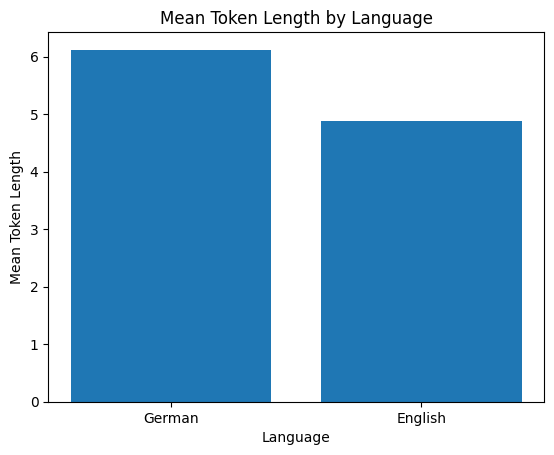

In [ ]:
import matplotlib.pyplot as plt

# Define the data
languages = ['German', 'English']
mean_lengths = [german_mean_length, english_mean_length]

# Set up the plot
fig, ax = plt.subplots()
ax.bar(languages, mean_lengths)

# Add labels and title
ax.set_xlabel('Language')
ax.set_ylabel('Mean Token Length')
ax.set_title('Mean Token Length by Language')

# Show the plot
plt.show()


**4. Word Cloud**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

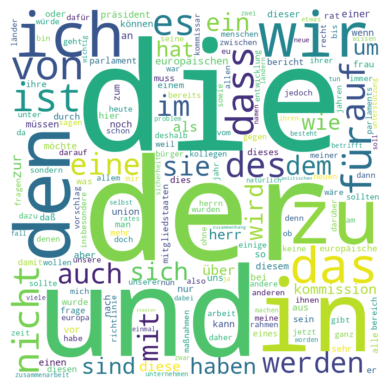

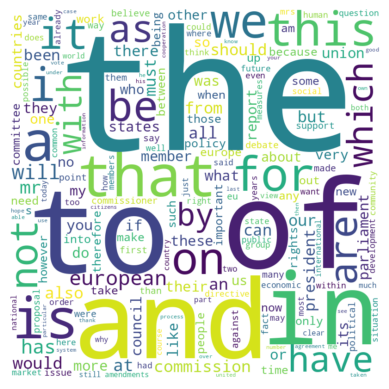

In [ ]:
from wordcloud import WordCloud

# Generate the German word cloud
german_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=nltk.corpus.stopwords.words('german'), min_font_size=10).generate_from_frequencies(german_freq)
plt.imshow(german_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate the English word cloud
english_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=nltk.corpus.stopwords.words('english'), min_font_size=10).generate_from_frequencies(english_freq)
plt.imshow(english_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

**5. POS Tag**

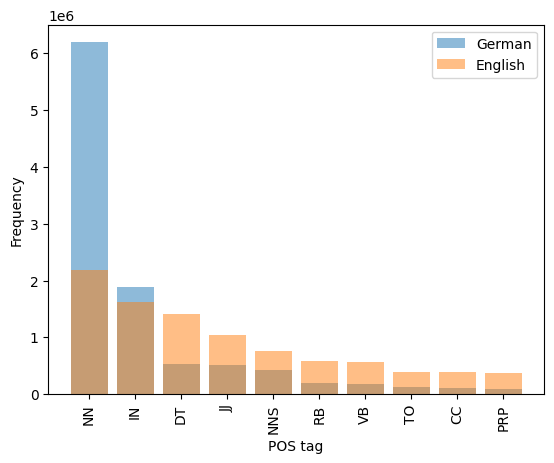

In [ ]:
import nltk
import matplotlib.pyplot as plt

# # Tokenize the German and English sentences
# german_tokens = nltk.word_tokenize('\n'.join(dataset['train']['translation']['de']))
# english_tokens = nltk.word_tokenize('\n'.join(dataset['train']['translation']['en']))

# Get the POS tags and frequencies for German and English
import nltk
import matplotlib.pyplot as plt

# Define a function to get POS tags and frequencies for a list of tokens
def get_pos_freq(tokens):
    pos_tags = nltk.pos_tag(tokens)
    pos_freq = nltk.FreqDist(tag for (word,tag) in pos_tags)
    return pos_freq

# Get the POS tags and frequencies for German and English
german_pos_freq = get_pos_freq(german_tokens)
english_pos_freq = get_pos_freq(english_tokens)

# Plot the top 10 POS tags for German and English
plt.bar(range(10), [freq[1] for freq in german_pos_freq.most_common(10)], tick_label=[freq[0] for freq in german_pos_freq.most_common(10)], alpha=0.5, label='German')
plt.bar(range(10), [freq[1] for freq in english_pos_freq.most_common(10)], tick_label=[freq[0] for freq in english_pos_freq.most_common(10)], alpha=0.5, label='English')
plt.xticks(rotation=90)
plt.xlabel('POS tag')
plt.ylabel('Frequency')
plt.legend()
plt.show()

